<a href="https://colab.research.google.com/github/elaverne/Spotify_Hits/blob/main/Segunda_Entrega%2BLaverne_Mastrodonato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Qué características hacen que los tracks de Spotify sean éxitos?**

La cantidad de tracks en Spotify a lo largo de los años ha aumentado exponencialmente. Sin embargo, se observa que no todos son éxitos o poseen gran popularidad entre la gente. 
Se quiere saber si ciertas características influyen en la popularidad de los mismos.
Se busca identificar patrones en los tracks más populares hasta el momento, lo que ayudaría a predecir posibles éxitos en el futuro. 

## ¿Existen patrones particulares en los tracks que puedan ser indicativos de éxitos?

Para poder verificar esto, se buscaron 2 bases de datos:
1. Una base obtenida de kaggle con tracks de spotify desde el año 1921 hasta 2020.
2. Buscamos una playlist con 10.000 canciones en spotify con tracks desde 1960 hasta la actualidad. Mediante la librería de spotipy importamos la información desde la API pública de la playlist. En base a la misma obtuvimos un dataframe con los tracks y sus principales características. 

Luego, unimos ambas bases para complementar la base obtenida de Kaggle con información más actual obtenida desde la API, formando una única base actualizada.


Una vez que obtuvimos la información, realizamos un análisis exploratorio y una limpieza de la misma, analizamos como evoluciono la popularidad a lo largo de los años y cómo afectan ciertas características a la popularidad.

## Importamos las librerias necesarias y la primer base obtenida de Kaggle

In [ ]:
!pip install kaggle # necesitamos una libreria

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle # creamos un directorio

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/ # copiamos nuestras credenciales

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json # cambiamos los permisos de nuestras credenciales

In [ ]:
# descargamos la base
!kaggle datasets download -d ektanegi/spotifydata-19212020

 69% 9.00M/13.0M [00:00<00:00, 38.8MB/s]
100% 13.0M/13.0M [00:00<00:00, 51.9MB/s]


In [ ]:
!unzip spotifydata-19212020.zip # Descomprimimos

Archive:  spotifydata-19212020.zip
  inflating: data.csv                


In [ ]:
#Importo librerias Necesarias
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Levanto la base a trabajar
base1=pd.read_csv('/content/data.csv')

In [ ]:
base1.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928


### Limpieza y exploración de datos de la primera base

In [ ]:
#Se convierte la duracion a minutos
base1['duration_min']=base1['duration_ms']*1.6667e-5

In [ ]:
base1=base1.drop(['duration_ms','release_date'], axis=1)

Vemos cantidad de filas y columnas y tipos de datos:

In [ ]:
base1.shape

(169909, 18)

In [ ]:
base1.dtypes

acousticness        float64
artists              object
danceability        float64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
speechiness         float64
tempo               float64
valence             float64
year                  int64
duration_min        float64
dtype: object

In [ ]:
base1.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_min
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231,3.856846
std,0.376627,0.175346,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168,2.022072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.085135
25%,0.094500,0.417000,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000,2.850724
50%,0.492000,0.548000,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000,3.476736
75%,0.888000,0.667000,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000,4.382754
max,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000,90.060135


Verificamos que hay valores con popularidad 0:

In [ ]:
base1['popularity'].value_counts()

0      27357
42      3280
43      3120
40      3061
44      3054
       ...  
93         3
99         1
96         1
100        1
97         1
Name: popularity, Length: 100, dtype: int64

In [ ]:
ver=base1[base1['popularity']==0]

In [ ]:
ver['year'].unique()

array([1928, 1930, 1935, 1936, 1940, 1942, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 2020, 1954, 1955, 1921, 1922, 1924, 1925,
       1927, 1929, 1931, 1932, 1934, 1941, 1943, 1923, 1926, 1937, 1938,
       1944, 1939, 1933])

Cuando la popularidad indica 0 no tiene sentido mantener el dato, ya que es información nula y al representar la variable objetivo esto alteraría los análisis posteriores. Adicionalmente, se observa que son años con poca información (anteriores a 1955 y 2020), por lo que se excluyen los tracks con popularidad 0.

In [ ]:
base1=base1[base1['popularity']!=0]

## Importamos las librerías necesarias y las credenciales de spotify para importar la segunda base desde la API

In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 140 kB 11.3 MB/s 
     |████████████████████████████████| 246 kB 63.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = '82a01b2ea2014110b87efc143a22cf15'
secret = 'f1b0d22df63a40d58f250e0c43f008b2'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#Seleccionamos el URI de la playlist que queremos importar 
Top100000_uri ='spotify:playlist:1YL4XoegERoragv0RK2RC9'

###Función que extrae los datos de la playlist con más de 100 canciones


Creamos una función que a partir del id de la playlist y el username extrae el id del track, el título, artista, explicit, first release date, popularity, danceability, energy, key, loudness, mode, acousticness, instrulmentalness, liveness, valence, tempo, duration_ms, time_signature.

**Descripción de las variables:**
* id del track: Código único del track
* title: Nombre del título del track.
* artist: Nombre de los artistas.
* duration_ms: Duración del track en milisegundos.
* explicit: La letra o el contenido de una canción o de un video de música contiene uno o más de los criterios que son considerados ofensivos o no apto para niños. 
* year: Año de lanzamiento del track.
* popularity: Cuanto más alto el valor, más popular es el track. 
* danceability: Describe qué tan apto es un track para bailar basado en una combinación de elementos musicales. Toma valores de 0 a 1, siendo 0 el menos danzable.  
* energy: Medida entre 0 y 1 que representa una medida porcentual de intensidad y actividad. 
* key: Mapea el tono de un tema usando la notación estándar de clasificación de tonos. Si no se detecta key, el valor es -1. 
* loudness: El volumen general de un track en decibeles (dB). Los valores van en un rango de -60 a 0 db.
* mode: Indica la modalidad (mayor o menor) de un track, el tipo de escala en que la melodía se reproduce. Mayor es representada por 1 y menor por 0.
* speechiness: Detecta la presencia de palabras habladas en un track. Los valores más cercanos a 1 son ejemplo talk show, audio book, poetry. Valores por encima del 0.66 describen tracks que son más probables de tener en casi su totalidad palabras habladas. Entre 0.33 y 0.66 contienen tanto música como palabras habladas. Valores menores a 0.33 probablemente representan música y otros tracks no hablados.
* acousticness: Medida entre 0 y 1 de la confianza en que un track es acústico.
* instrumentalness: Predice si un track es no vocal. Sonidos como "Ooh" y "aah" son considerados instrumentales en este contexto. Rap o tracks con palabras habladas son claramente vocales. Valores cercanos entre 0.5 a 1 son probablemente tracks con contenidos no vocales.
* liveness: Detecta la presencia de una audiencia en la grabación del track. Valores altos de liveness indican mayor probabilidad de un track grabado en vivo. 
* valence: Medida entre 0 y 1 que describe la positividad musical de un track. Tracks con mayor valence suenan más positivos (alegres, euforicos) mientras valores bajos suenan más negativos (tristes, depresivos, enojados). 
* tempo: El tempo general estimado de un track en beats por minutos (BPM). Es la velocidad o el ritmo de un track.


In [ ]:
def get_playlist_tracks_more_than_100_songs(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_name = []
    playlist_tracks_artists = []
    playlist_tracks_explicit = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []

    for i in range(len(results)):
        print(i) # Counter
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_name = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_popularity = results[i]['track']['popularity']
            playlist_tracks_explicit = results[i]['track']['explicit']


            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list

            features = sp.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['name'] = playlist_tracks_name
            features_df['artists'] = playlist_tracks_artists
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df['explicit'] = playlist_tracks_explicit
            features_df = features_df[['id', 'name', 'artists', 'popularity', 'release_date','explicit',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness', 'speechiness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_name = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_popularity = results[i]['track']['popularity']
                playlist_tracks_explicit = results[i]['track']['explicit']
                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list
                features = sp.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'name':[playlist_tracks_name],
               'artists':[playlist_tracks_artists],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'explicit':[playlist_tracks_explicit],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'speechiness':[features[0]['speechiness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [ ]:
top100000 = get_playlist_tracks_more_than_100_songs(cid, Top100000_uri)

Base obtenida para el análisis:

In [ ]:
top100000.head(2)

,id,name,artists,popularity,release_date,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,duration_ms,time_signature
0,1XlCCgKKrQQfXaDyv4GrZe,Mustang Sally,Andrew Strong,60,1991-01-01,False,0.744,0.735,1,-10.766,1,0.011,0.0,0.0587,0.0564,0.891,115.062,241867,4
1,5vjigjfoXuJEttqLB3HTAg,Personality,Lloyd Price,47,1994-01-01,False,0.591,0.454,5,-8.936,1,0.744,0.0,0.0322,0.0989,0.865,128.909,157733,4


Vemos cantidad de filas y columnas y tipos de datos:

In [ ]:
top100000.shape

(9975, 19)

In [ ]:
top100000.dtypes

id                   object
name                 object
artists              object
popularity            int64
release_date         object
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
speechiness         float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [ ]:
base2=top100000.copy()

### Limpieza y exploración de datos de la segunda base

Convertimos las fechas de lanzamiento a años de lanzamiento, cambiamos la variable explicit de bool a 0 y 1, convertimos la duración de milisegundos a minutos

In [ ]:
#Vemos fechas de lanzamiento únicas para ver duplicados:
base2['release_date'].unique()

array(['1991-01-01', '1994-01-01', '2008-08-04', ..., '2022-03-19',
       '2022-07-01', '2022-09-22'], dtype=object)

In [ ]:
base2['release_date'].value_counts()

2009-01-01    131
2011-01-01    127
2013-01-01    108
2010-01-01     98
2008-01-01     82
             ... 
1993-08-10      1
1992-01-13      1
2015-06-19      1
1992-03-30      1
2022-09-22      1
Name: release_date, Length: 3285, dtype: int64

In [ ]:
#Vemos la cantidad de canciones explicitas
base2['explicit'].value_counts()

False    9483
True      492
Name: explicit, dtype: int64

In [ ]:
#Transformamos fecha de lanzamiento por año de lanzamiento:
base2['year']= base2['release_date'].str[:4]
base2.head(2)

,id,name,artists,popularity,release_date,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,duration_ms,time_signature,year
0,1XlCCgKKrQQfXaDyv4GrZe,Mustang Sally,Andrew Strong,60,1991-01-01,False,0.744,0.735,1,-10.766,1,0.011,0.0,0.0587,0.0564,0.891,115.062,241867,4,1991
1,5vjigjfoXuJEttqLB3HTAg,Personality,Lloyd Price,47,1994-01-01,False,0.591,0.454,5,-8.936,1,0.744,0.0,0.0322,0.0989,0.865,128.909,157733,4,1994


In [ ]:
base2['year'].value_counts()

2015    421
2014    411
2009    411
2016    398
2011    397
       ... 
1961     11
1960     10
1959      4
0000      1
1956      1
Name: year, Length: 67, dtype: int64

Excluimos el registro que no tiene año de lanzamiento (0000):

In [ ]:
base2= base2[base2['year']!='0000']
base2.head(2)

,id,name,artists,popularity,release_date,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,duration_ms,time_signature,year
0,1XlCCgKKrQQfXaDyv4GrZe,Mustang Sally,Andrew Strong,60,1991-01-01,False,0.744,0.735,1,-10.766,1,0.011,0.0,0.0587,0.0564,0.891,115.062,241867,4,1991
1,5vjigjfoXuJEttqLB3HTAg,Personality,Lloyd Price,47,1994-01-01,False,0.591,0.454,5,-8.936,1,0.744,0.0,0.0322,0.0989,0.865,128.909,157733,4,1994


In [ ]:
#Convertimos año de lanzamiento en integer
base2['year']=base2['year'].astype('int64')

In [ ]:
#Transformamos explicit en booleano
base2['explicit']=np.where(base2['explicit']==False,0,1)

In [ ]:
#Se convierte la duracion a minutos
base2['duration_min']=base2['duration_ms']*1.6667e-5

In [ ]:
base2.dtypes

id                   object
name                 object
artists              object
popularity            int64
release_date         object
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
speechiness         float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
year                  int64
duration_min        float64
dtype: object

In [ ]:
#Excluimos columnas transformadas en nuevas
base2=base2.drop(['duration_ms','release_date','time_signature'], axis=1)

In [ ]:
base2.head(2)

,id,name,artists,popularity,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,year,duration_min
0,1XlCCgKKrQQfXaDyv4GrZe,Mustang Sally,Andrew Strong,60,0,0.744,0.735,1,-10.766,1,0.011,0.0,0.0587,0.0564,0.891,115.062,1991,4.031197
1,5vjigjfoXuJEttqLB3HTAg,Personality,Lloyd Price,47,0,0.591,0.454,5,-8.936,1,0.744,0.0,0.0322,0.0989,0.865,128.909,1994,2.628936


Vemos los tipos de datos de la base y si existen nulos:

In [ ]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9974
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9974 non-null   object 
 1   name              9974 non-null   object 
 2   artists           9974 non-null   object 
 3   popularity        9974 non-null   int64  
 4   explicit          9974 non-null   int64  
 5   danceability      9974 non-null   float64
 6   energy            9974 non-null   float64
 7   key               9974 non-null   int64  
 8   loudness          9974 non-null   float64
 9   mode              9974 non-null   int64  
 10  acousticness      9974 non-null   float64
 11  instrumentalness  9974 non-null   float64
 12  speechiness       9974 non-null   float64
 13  liveness          9974 non-null   float64
 14  valence           9974 non-null   float64
 15  tempo             9974 non-null   float64
 16  year              9974 non-null   int64  


Observamos los valores mínimos, máximos, cuartiles, medias y desvíos de cada característica de los tracks:

In [ ]:
base2.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,year,duration_min
count,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,36.095348,0.049328,0.607509,0.681744,5.168338,-7.287738,0.697313,0.210679,0.029457,0.065042,0.185878,0.584817,121.357711,2001.761079,3.753581
std,28.003940,0.216563,0.146083,0.192248,3.577568,3.285135,0.459444,0.250653,0.123697,0.061316,0.149289,0.238870,26.300015,15.184145,0.908178
min,0.000000,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000003,0.000000,0.000000,0.012000,0.000000,0.000000,1956.000000,1.520480
25%,0.000000,0.000000,0.514000,0.558000,2.000000,-9.095750,0.000000,0.018500,0.000000,0.033100,0.089300,0.398000,102.230000,1993.000000,3.214339
50%,41.000000,0.000000,0.617000,0.710000,5.000000,-6.546500,1.000000,0.096650,0.000006,0.042900,0.128000,0.595500,120.364500,2007.000000,3.667073
75%,61.000000,0.000000,0.710000,0.835000,8.000000,-4.897000,1.000000,0.323750,0.000565,0.067100,0.245000,0.782000,134.157500,2014.000000,4.178379
max,100.000000,1.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.991000,0.985000,0.711000,0.989000,0.995000,217.913000,2022.000000,26.019404


Excluimos los tracks duplicados:

In [ ]:
base2=base2.drop_duplicates()

In [ ]:
base2.shape

(9924, 18)

Verificamos que hay valores con popularidad 0 y que ciertos tracks se repiten:

In [ ]:
base2['popularity'].value_counts()

0      2609
66      153
53      146
59      145
64      144
       ... 
94        1
96        1
98        1
93        1
100       1
Name: popularity, Length: 97, dtype: int64

In [ ]:
#Contamos los titulos de canciones que son iguales
base2['name'].value_counts()

One                                         9
Hello                                       8
Sorry                                       8
Stay                                        7
Burn                                        6
                                           ..
Amigos Para Siempre - Friends for Life      1
To Be with You - 2010 Remastered Version    1
November Rain                               1
Achy Breaky Heart                           1
Universally Speaking                        1
Name: name, Length: 8236, dtype: int64

Por ejemplo, la canción llamada "One" se encuentra 9 veces en la base y algunas son diferentes versiones de la misma canción de la banda U2 en distintos albums.

In [ ]:
base2[base2['name']=='One']

,id,name,artists,popularity,explicit,danceability,energy,key,loudness,mode,acousticness,instrumentalness,speechiness,liveness,valence,tempo,year,duration_min
909,0UzMTr7IBIaQpAiyMHe7uK,One,Johnny Farnham,25,0,0.341,0.564,7,-6.461,0,0.01550,0.00000,0.0353,0.1230,0.515,128.155,1995,2.832723
3009,3PKtemUKxiDBvBo7tpQ8bG,One,U2,0,0,0.511,0.536,0,-8.661,1,0.25600,0.00265,0.0302,0.1220,0.357,90.358,1991,4.603209
5547,3G69vJMWsX6ZohTykad2AU,One,U2,76,0,0.392,0.534,0,-8.793,1,0.24500,0.00104,0.0369,0.1550,0.325,181.305,1991,4.603209
7857,28BRbc0uO1WY7eFrkwaP2U,One,U2,0,0,0.556,0.616,0,-5.760,1,0.24200,0.00137,0.0275,0.1480,0.286,90.759,2006,4.590092
8151,5TvFfDlVoUWZvfqrhTJzD7,One,Ed Sheeran,62,0,0.464,0.321,2,-11.120,1,0.87700,0.00000,0.0418,0.0789,0.306,93.528,2014,4.212751
8786,7fGwROu7fgPGy0Ru8Q5nBJ,One,U2,0,0,0.556,0.616,0,-5.760,1,0.24200,0.00137,0.0275,0.1480,0.286,90.759,2006,4.590092
8884,64Ret7Tf2M8pDE4aqbW2tX,One,Metallica,0,0,0.444,0.703,7,-9.443,1,0.00112,0.07610,0.0641,0.1270,0.419,106.228,1988,7.457482
9524,51s7AF4GLioU2tLiz3L3Jp,One,Harry Nilsson,0,0,0.449,0.241,0,-11.821,0,0.89200,0.00103,0.0365,0.1500,0.189,123.348,2017,2.366047
9670,3hy2LCvHFEu0yuF9lXR9RK,One,John Farnham,0,0,0.332,0.565,7,-6.439,0,0.01390,0.00000,0.0359,0.1150,0.508,131.778,2003,2.850057


Se excluyen los tracks con popularidad 0, ya que en la mayoría de los casos son una nueva versión de un track ya existente que si tiene informacion de popularidad. Cuando la popularidad indica 0 no tiene sentido mantener el dato, ya que es información nula y al representar la variable objetivo esto alteraría los análisis posteriores. 

In [ ]:
base2=base2[base2['popularity']!=0]

## Unimos las dos bases

In [ ]:
base= pd.concat([base1,base2],axis=0)

In [ ]:
base.head(2)

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,duration_min
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.21,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,11.462446
11,0.989,"['Frédéric Chopin', 'Vladimir Horowitz']",0.17,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,0.0317,85.989,0.3460,1928,1.418912


Vemos la cantidad, los tipos de datos de la base y si existen nulos:

In [ ]:
base.shape

(149867, 18)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149867 entries, 4 to 9974
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      149867 non-null  float64
 1   artists           149867 non-null  object 
 2   danceability      149867 non-null  float64
 3   energy            149867 non-null  float64
 4   explicit          149867 non-null  int64  
 5   id                149867 non-null  object 
 6   instrumentalness  149867 non-null  float64
 7   key               149867 non-null  int64  
 8   liveness          149867 non-null  float64
 9   loudness          149867 non-null  float64
 10  mode              149867 non-null  int64  
 11  name              149867 non-null  object 
 12  popularity        149867 non-null  int64  
 13  speechiness       149867 non-null  float64
 14  tempo             149867 non-null  float64
 15  valence           149867 non-null  float64
 16  year              1498

Observamos los valores mínimos, máximos, cuartiles, medias y desvíos de cada característica de los tracks:

In [ ]:
base.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_min
count,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000,149867.000000
mean,0.411380,0.549439,0.539203,0.084708,0.122238,5.203560,0.202192,-10.453549,0.709482,38.162371,0.077386,118.754484,0.538623,1984.870372,3.900128
std,0.353029,0.172846,0.259809,0.278448,0.273372,3.521703,0.177370,5.313415,0.454003,18.398216,0.101612,30.174920,0.259945,21.843428,1.818395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1921.000000,0.245138
25%,0.058400,0.434000,0.334000,0.000000,0.000000,2.000000,0.095200,-13.243000,0.000000,25.000000,0.034000,95.659000,0.331000,1968.000000,2.932725
50%,0.335000,0.559000,0.552000,0.000000,0.000074,5.000000,0.131000,-9.551000,1.000000,39.000000,0.043400,116.526000,0.548000,1986.000000,3.604855
75%,0.759000,0.674000,0.753000,0.000000,0.020300,8.000000,0.254000,-6.517000,1.000000,51.000000,0.069800,137.166000,0.755000,2004.000000,4.440089
max,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.968000,244.091000,1.000000,2022.000000,90.060135


Una vez obtenida la base, vamos a empezar a analizar las hipotésis / preguntas de interés:

## ¿Qué características de los tracks afectan la popularidad?

Vemos las correlaciones entre las distintas características de los tracks y la popularidad, que es la variable que intentamos clasificar o predecir

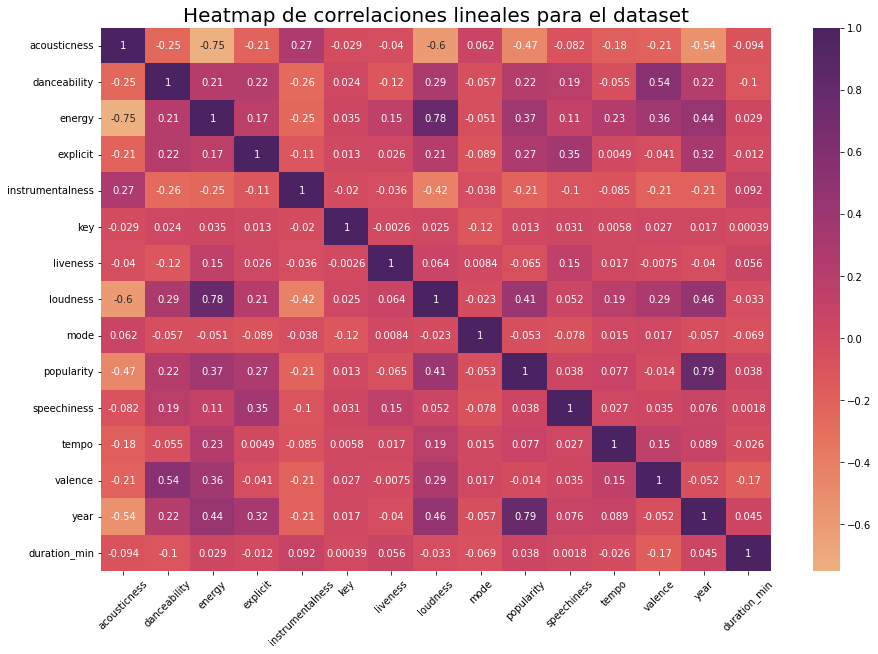

In [ ]:
#Hacemos un heatmap de las correlaciones:
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(base.corr(), annot = True, cmap = 'flare')
plt.title('Heatmap de correlaciones lineales para el dataset', fontsize = 20)
plt.xticks(rotation=45)
plt.show()

Tal como planteamos, buscamos identificar que variables de los tracks afectan la popularidad, para ello observamos las correlaciones: las variables danceability, explicit, loudness, energy y year tienen una correlación positiva con popularity, es decir a medida que aumentan en valor, aumenta la popularidad. Mientras que acousticness e instrumentalness tienen correlación negativa con popularity, es decir a medida que aumentan, disminuye la popularidad. 

## ¿A lo largo de los años aumento la popularidad?

A partir de un gráfico de boxplot, se busca obtener una tendencia de la popularidad de los tracks a lo largo de los años. Se quiere conocer la media, mediana, cuartiles y valores atípicos de la popularidad.

In [ ]:
#Agrupamos la base por año y por valor de popularidad:
Aux=base[['year','popularity','id']].groupby(by=['year','popularity']).count().reset_index()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 <a list of 102 Text major ticklabel objects>)

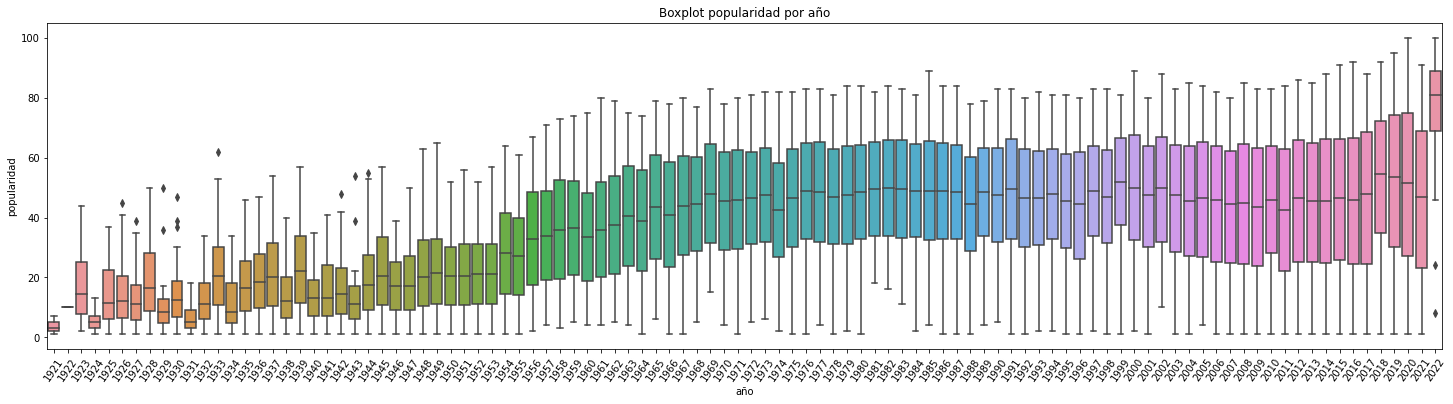

In [ ]:
plt.figure(figsize=(25,6))
sns.boxplot(x=Aux.year, y= Aux.popularity)
plt.title('Boxplot popularidad por año')
plt.xlabel('año')
plt.ylabel('popularidad')
plt.xticks(rotation=55)

Observamos la información de los últimos años, para entender si es significativa:

In [ ]:
a=base[base['year']>=2010]

In [ ]:
a['year'].value_counts()

2011    2280
2014    2278
2012    2247
2017    2241
2010    2233
2016    2233
2015    2207
2018    2204
2013    2203
2019    2191
2020    1915
2021     189
2022      33
Name: year, dtype: int64

Se puede observar que a lo largo de los años la popularidad se ha ido incrementando. 
A su vez, también se observa que la popularidad se mantiene consistente a lo largo de las décadas, a partir de la década del 60 ya que para años anteriores se observa un comportamiento errático y que los años 2021 y 2022 presentan un comportamiento sustancialmente diferente a los años anteriores. Estos comportamientos atípicos se deben a la falta de datos (como pudimos observar previamente son años con la menor cantidad de datos).

Dado esto, observamos el comportamiento de los tracks agrupándolos por décadas y excluyendo los años anteriores a 1970, ya que no son significativos, y los años 2021 y 2022 por no poseer suficiente información (2022 no es un año completo por ejemplo).

In [ ]:
base=base[base['year']>=1970]

In [ ]:
#Creamos la variable decadas
conditions = [base['year']<=1979,
              base['year']<=1989,   
              base['year']<=1999,  
              base['year']<=2009,  
              base['year']<=2020,

              ]  

options = ['Setentas',
           'Ochentas',
           'Noventas',
           'Dos miles',
           'Dos mil 10',
           ]

base['Decadas'] = np.select(conditions,options,default='Ver')

In [ ]:
base=base[base['Decadas']!='Ver']

## ¿Cómo afecta la duración de un track en su popularidad?

Se busca conocer si la duración de un track en minutos afecta la popularidad o no. Es decir, si tracks más cortos son más populares o no.

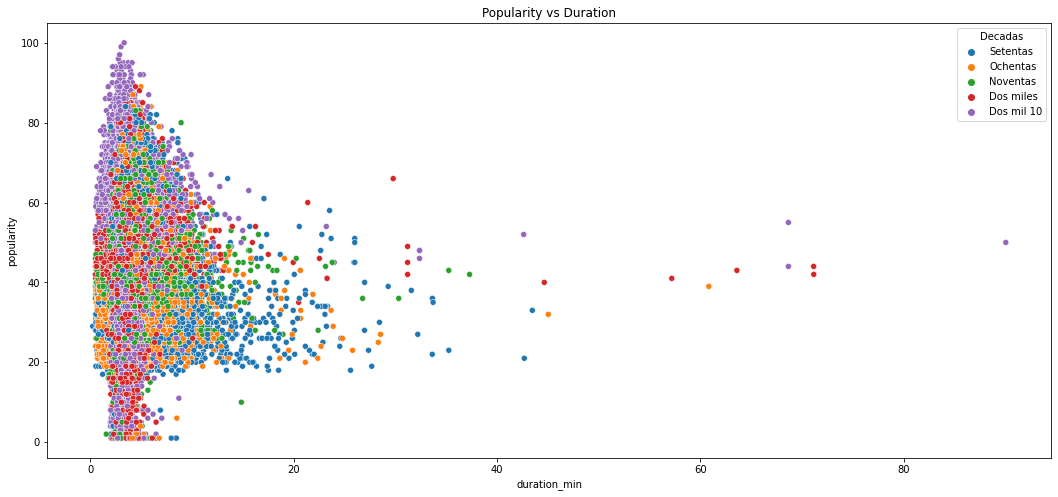

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Popularity vs Duration')
sns.scatterplot(data=base,x='duration_min',y='popularity',hue='Decadas')

***Tratamiento de outliers en la variable Duration***

Se observan ciertos valores atípicos para la duración en minutos de los tracks (valores entre 10 y 30 minutos), se procedió a excluirlos del análisis por no ser tracks representativos.

In [ ]:
# Tomamos columnas de interes
datos = base[['Decadas','duration_min','id']]
datos.shape

(108298, 3)

In [ ]:
from tqdm import tqdm

# Creamos un data frame vacio
outlier = pd.DataFrame()

# Iniciamos el loop que itera por cada decada 
for i in tqdm(datos['Decadas'].drop_duplicates().tolist()):
    
    print("Corriendo segmento "+str(i))
    
    datos_ = datos[(datos['Decadas']==i)]
    datos_z=pd.DataFrame()
    datos_z['Fecha']= datos_.Decadas
    datos_z['duration_min'] = datos_.duration_min
    datos_z['id'] = datos_.id
    datos_z['Z'] = (datos_['duration_min'] - datos_['duration_min'].mean()) / datos_['duration_min'].std()
    datos_z['Status']= datos_z['Z'].apply(lambda x: 'Atipico' if (x>3 or x<-3) else 'Normal')
    datos_z=datos_z[(datos_z['Status']=='Atipico')]

    outlier = outlier.append(datos_z)

100%|██████████| 5/5 [00:00<00:00, 30.36it/s]

Corriendo segmento Setentas
Corriendo segmento Ochentas
Corriendo segmento Noventas
Corriendo segmento Dos miles
Corriendo segmento Dos mil 10


Quitamos los tracks que resultan atípicos por tener una duración mayor:

In [ ]:
Aux=outlier[['id','Status']]
Aux.head(2)

,id,Status
3069,2NJirbzL4zisT8kAM8s3VY,Atipico
3134,0FFGwdVVLc7lBHRP1y7LrS,Atipico


In [ ]:
BaseVF=base.merge(Aux, how='left',on='id')
BaseVF.shape

(108308, 20)

In [ ]:
BaseVF=BaseVF[BaseVF['Status']!='Atipico']
BaseVF=BaseVF.drop(columns=['Status'])
BaseVF.shape

(107153, 19)

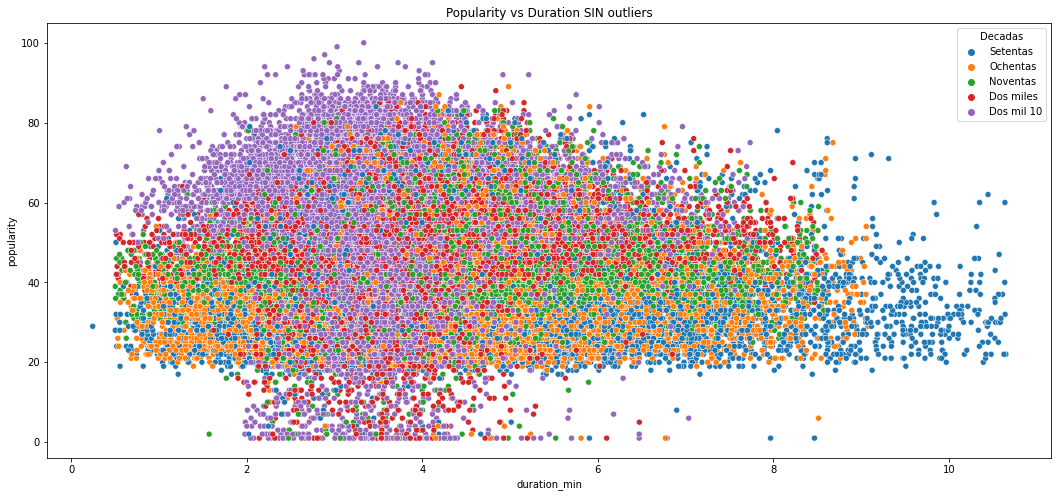

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Popularity vs Duration SIN outliers')
sns.scatterplot(data=BaseVF,x='duration_min',y='popularity',hue='Decadas')

In [ ]:
Aux1=BaseVF[['Decadas','duration_min']].groupby(by=['Decadas']).mean().reset_index()

In [ ]:
conditions = [Aux1['Decadas']== 'Setentas',
              Aux1['Decadas']== 'Ochentas',   
              Aux1['Decadas']==	'Noventas',  
              Aux1['Decadas']==	'Dos miles',
              Aux1['Decadas']==	'Dos mil 10'
              ]  

options = [1970,
           1980,
           1990,
           2000, 
           2010
           ]

Aux1['Decadas_'] = np.select(conditions,options,default=0)

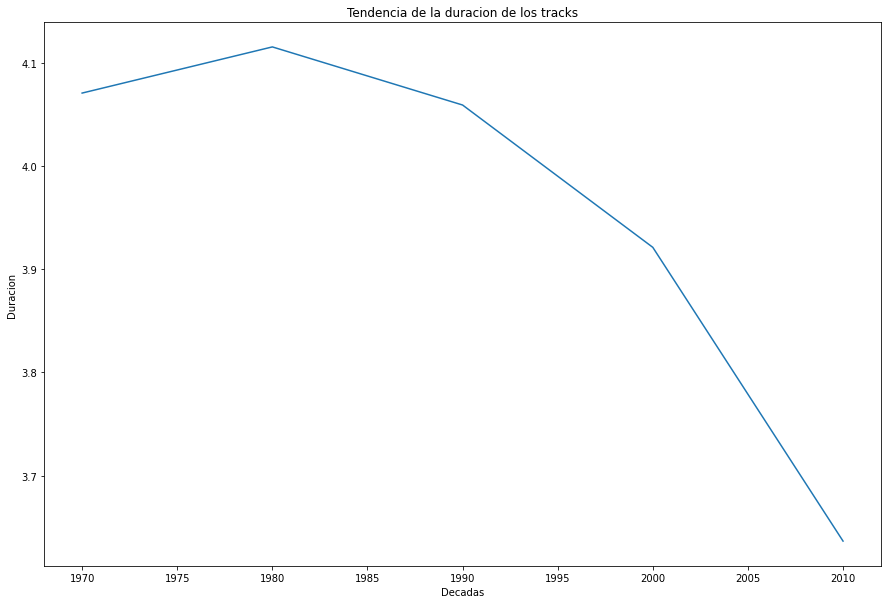

<Figure size 1296x576 with 0 Axes>

In [ ]:
x = Aux1['Decadas_'] 
y = Aux1['duration_min'] 
  
plt.plot(x, y) 


# Personalizamos
plt.title('Tendencia de la duracion de los tracks')
plt.xlabel('Decadas')
plt.ylabel('Duracion')
plt.figure(figsize=(18,8))
plt.tight_layout() # Ajustamos los parámetros para que se obtenga un gráfico limpio
plt.show() # mostrar la grafica

En cuanto a la duración de los tracks, se observa una tendencia a duraciones más cortas (entre 0 y 5 min) y también que el promedio de los tracks va disminuyendo a lo largo de las décadas. Sin embargo, no se puede concluir que la duración de los tracks afecte significativamente a la popularidad.

## ¿Cómo afecta el instrumentalness (si el track contiene palabras habladas o no) en la popularidad? ¿Cómo afecta la danceability (que tan adecuado es el track para bailar) en la popularidad?

Agrupamos por rangos las variables instrumentalness y danceability para poder gráficar por cuartiles:

In [ ]:
conditions = [BaseVF['instrumentalness']<=0.25,
              BaseVF['instrumentalness']<=0.5,   
              BaseVF['instrumentalness']<=0.75,  
              BaseVF['instrumentalness']<=1 
              ]  

options = [1,
           2,
           3,
           4, 
           ]

BaseVF['Instrumental'] = np.select(conditions,options,default=0)

In [ ]:
conditions = [BaseVF['danceability']<=0.25,
              BaseVF['danceability']<=0.5,   
              BaseVF['danceability']<=0.75,  
              BaseVF['danceability']<=1 
              ]  

options = [1,
           2,
           3,
           4, 
           ]

BaseVF['Danzable'] = np.select(conditions,options,default=0)

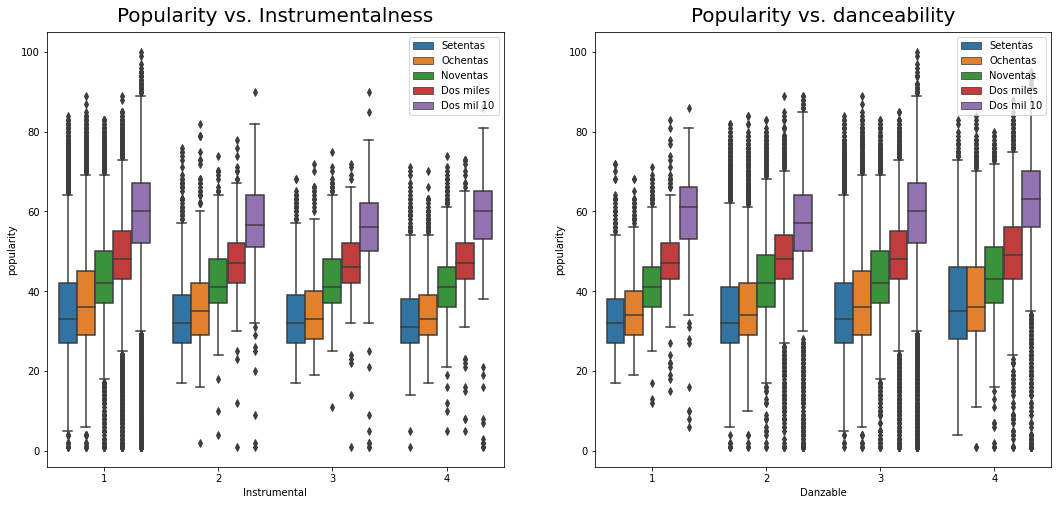

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.boxplot(x='Instrumental', y = 'popularity',hue= 'Decadas', data = BaseVF) 
plt.title("Popularity vs. Instrumentalness", fontsize=20, verticalalignment='bottom')
plt.legend(loc='upper right')

plt.subplot(122)
sns.boxplot(x='Danzable', y = 'popularity',hue= 'Decadas', data = BaseVF) 
plt.title("Popularity vs. danceability", fontsize=20, verticalalignment='bottom')
plt.legend(loc='upper right')


plt.show()

In [ ]:
BaseVF[['name','instrumentalness','Instrumental','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).head(15).reset_index()


,name,instrumentalness,Instrumental,popularity
0,death bed (coffee for your head) (feat. beabad...,0.000000,1.0,97.0
1,GOOBA,0.000000,1.0,94.0
2,Sunday Best,0.000000,1.0,93.0
3,Yo Perreo Sola,0.000065,1.0,92.0
4,Safaera,0.000000,1.0,92.0
5,Tusa,0.000134,1.0,92.0
6,Savage Remix (feat. Beyoncé),0.000000,1.0,92.0
7,Play Date,0.000000,1.0,91.0
8,Intentions,0.000000,1.0,90.0
9,TKN (feat. Travis Scott),0.000001,1.0,90.0


In [ ]:
BaseVF[['name','danceability','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).head(15).reset_index()

,name,danceability,popularity
0,death bed (coffee for your head) (feat. beabad...,0.726,97.0
1,GOOBA,0.611,94.0
2,Sunday Best,0.878,93.0
3,Yo Perreo Sola,0.860,92.0
4,Safaera,0.607,92.0
5,Tusa,0.803,92.0
6,Savage Remix (feat. Beyoncé),0.822,92.0
7,Play Date,0.680,91.0
8,Intentions,0.811,90.0
9,TKN (feat. Travis Scott),0.776,90.0


Se observa que los tracks más populares se encuentran para niveles de danzabilidad altos (mayores a 0.5 en general). En cuanto a instrumentalness, se puede observar que los tracks más populares son aquellos que poseen un instrumentalness menor a 0.25. 

Si bien de una primera observación del gráfico parecería que hay presencia de outliers, los valores se encuentran en los rangos normales que pueden tomar las variables. Estos valores que pudieran parecer atípicos, en realidad son los tracks más populares, de los que se busca conocer las características.

##¿Las canciones explícitas son más populares que las canciones no explícitas?

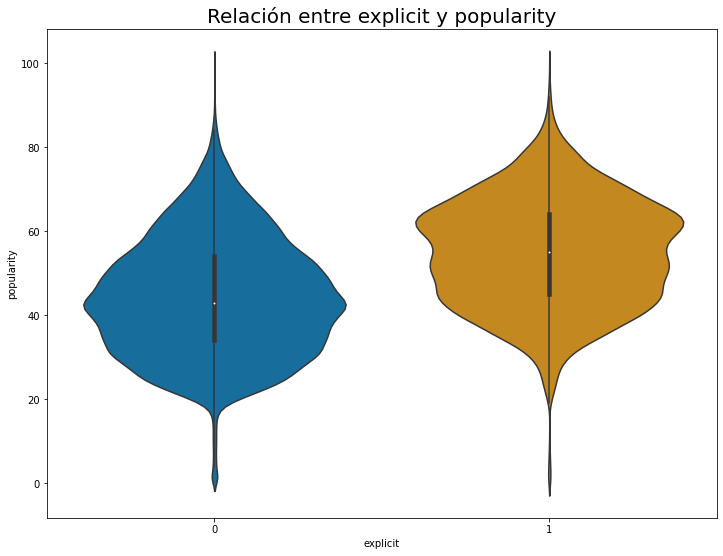

In [ ]:
# explicit vs popularity
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data=BaseVF,x ='explicit', y = 'popularity', palette = 'colorblind')
plt.title('Relación entre explicit y popularity', fontsize = 20, fontweight = 30)
plt.show()

Se puede observar que los tracks explicítos poseen mayor concentración en rangos de popularidad altos, mientras que las canciones no explicítas poseen mayor concentración en rangos medios. Esto se puede visualizar, por ejemplo, observando que la mediana de los tracks explícitos se encuentra en el rango 60/80, mientras que la de los no explícitos se encuentra en el rango 40/60.

## ¿Existe algún patrón en las canciones más populares y las menos populares en cuanto a las variables acousticness, danceability, instrumentalness, energy y valence?

Buscamos las canciones más y menos populares en la base y graficamos sus principales características (acousticness, danceability, instumentalness, energy y valence) para ver si se puede identificar algún patrón

In [ ]:
BaseVF[['name','danceability','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).head(20).reset_index()

,name,danceability,popularity
0,death bed (coffee for your head) (feat. beabad...,0.726,97.0
1,GOOBA,0.611,94.0
2,Sunday Best,0.878,93.0
3,Yo Perreo Sola,0.860,92.0
4,Safaera,0.607,92.0
5,Tusa,0.803,92.0
6,Savage Remix (feat. Beyoncé),0.822,92.0
7,Play Date,0.680,91.0
8,Intentions,0.811,90.0
9,TKN (feat. Travis Scott),0.776,90.0


In [ ]:
BaseVF[['name','danceability','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).tail(510).reset_index()

,name,danceability,popularity
0,Hotrod Gang,0.583,19.0
1,I Get a Kick Out of You,0.624,19.0
2,To Be True,0.524,19.0
3,Heavy Fallin' Out,0.469,19.0
4,Freedom For The Stallion,0.426,19.0
...,...,...,...
505,Greenfields,0.457,1.0
506,Beatnik Fly,0.502,1.0
507,Italo House Mix,0.743,1.0
508,The Wah-Watusi,0.770,1.0


Elegimos al azar algunas de las canciones más populares para gráficar y en cuanto a las menos populares elegimos gráficar las que poseen una popularidad menor al promedio de la última década:

Canciones más populares:
- Tusa
- Yo Perreo Sola 
- Stuck with U (with Justin Bieber)	
- Hasta Que Dios Diga

Canciones menos populares:
- Sound Chaser	
- Hamburger Lady - Remastered	
- Nothing Matters
- Squeeze Box - Live	

Buscamos la posición de los tracks elegidos para graficarlos:

In [ ]:
list=['Tusa','Yo Perreo Sola','Stuck with U (with Justin Bieber)','Hasta Que Dios Diga','Sound Chaser','Hamburger Lady - Remastered','Nothing Matters','Squeeze Box - Live']

BaseVF[BaseVF['name'].isin(list)]


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable
30929,0.153,['Yes'],0.276,0.823,0,491mibMsLMgOwAtdCsynPm,0.042500,2,0.0922,-7.559,...,Sound Chaser,19,0.1680,147.075,0.2550,1974,9.511307,Setentas,1,2
46271,0.154,['The Who'],0.401,0.941,0,4tek7LxdrKwb1Mc65eHdXK,0.000027,7,0.7450,-8.716,...,Squeeze Box - Live,19,0.2850,137.162,0.3490,1975,4.228535,Setentas,1,2
46570,0.599,['Throbbing Gristle'],0.347,0.591,0,7eAewwhDIvqRKaIuRp71Sv,0.844000,2,0.1010,-20.368,...,Hamburger Lady - Remastered,19,0.1340,83.065,0.0399,1978,4.150466,Setentas,4,2
55776,0.295,"['KAROL G', 'Nicki Minaj']",0.803,0.715,0,7k4t7uLgtOxPwTpFmtJNTY,0.000134,2,0.0574,-3.280,...,Tusa,92,0.2980,101.085,0.5740,2019,3.349400,Dos mil 10,1,4
55820,0.223,"['Ariana Grande', 'Justin Bieber']",0.597,0.450,0,4HBZA5flZLE435QTztThqH,0.000000,8,0.3820,-6.658,...,Stuck with U (with Justin Bieber),94,0.0418,178.765,0.5370,2020,3.808109,Dos mil 10,1,3
55837,0.021,['Bad Bunny'],0.860,0.758,0,0SqqAgdovOE24BzxIClpjw,0.000065,11,0.3440,-5.160,...,Yo Perreo Sola,92,0.0695,97.014,0.4530,2020,2.868841,Dos mil 10,1,4
55868,0.464,"['Anuel AA', 'Bad Bunny']",0.691,0.765,1,06s3QtMJVXw1AJX3UfvZG1,0.000003,8,0.2030,-4.727,...,Hasta Que Dios Diga,88,0.1110,174.021,0.8550,2020,4.100082,Dos mil 10,1,3
105263,0.223,Justin Bieber,0.597,0.450,0,4HBZA5flZLE435QTztThqH,0.000000,8,0.3820,-6.658,...,Stuck with U (with Justin Bieber),83,0.0418,178.765,0.5370,2020,3.808109,Dos mil 10,1,3
105790,0.207,Jess & Matt,0.467,0.715,0,4fgcGJjA7ALwhfzMv5SsZX,0.000000,7,0.1110,-4.594,...,Nothing Matters,19,0.0424,173.866,0.5360,2015,3.035744,Dos mil 10,1,2


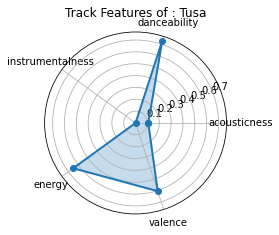

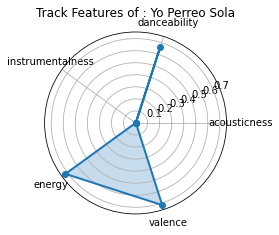

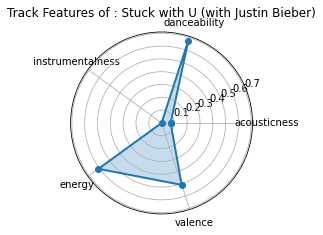

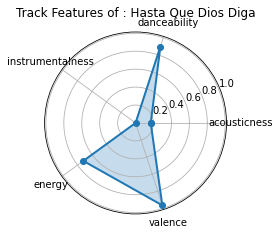

In [ ]:
#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55777,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))

ax = plt.subplot(141, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55776,'name'])
ax.grid(True)


#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55838,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(142, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55837,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55821,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(143, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55820,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55869,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(144, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55868,'name'])
ax.grid(True)

De los gráficos de radar, se puede observar que los tracks más populares poseen características similares, se puede observar un patrón.

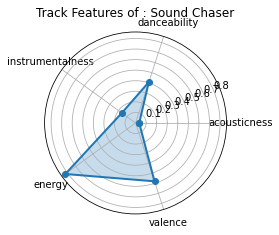

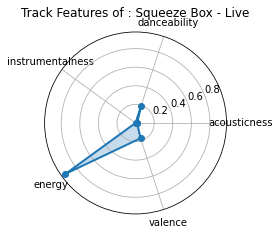

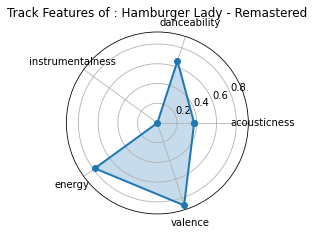

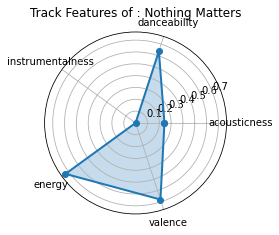

In [ ]:
#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[30930,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))

ax = plt.subplot(141, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[30929,'name'])
ax.grid(True)


#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[46272,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(142, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[46271,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[46571,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(143, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[46570,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[105791,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(144, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[105790,'name'])
ax.grid(True)

De los gráficos de radar, se puede observar que los tracks menos populares no poseen un patrón identificable, son más erráticos.

## Observaciones

*  Se puede observar que a lo largo de los años la popularidad se ha ido incrementando. A su vez, también se observa que la popularidad se mantiene consistente a lo largo de las décadas, a partir de la década del 60 ya que para años anteriores se observa un comportamiento errático y que los años 2021 y 2022 presentan un comportamiento sustancialmente diferente a los años anteriores. Estos comportamientos atípicos se deben a la falta de datos (como pudimos observar previamente son años con la menor cantidad de datos).
* Dado esto, observamos el comportamiento de los tracks agrupándolos por décadas y excluyendo los años anteriores a 1970, ya que no son significativos, y los años 2021 y 2022 por no poseer suficiente información (2022 no es un año completo por ejemplo).
*  Se excluyen los tracks con popularidad 0, ya que en la mayoría de los casos son una nueva versión de un track ya existente que si tiene informacion de popularidad. Cuando la popularidad indica 0 no tiene sentido mantener el dato, ya que es información nula y al representar la variable objetivo esto alteraría los análisis posteriores.
* En cuanto a la duración de los tracks, se observa una tendencia a duraciones más cortas (entre 0 y 5 min) y también que el promedio de los tracks va disminuyendo a lo largo de las décadas. Sin embargo, no se puede concluir que la duración de los tracks afecte significativamente a la popularidad.
*  Se observa que los tracks más populares se encuentran para niveles de danzabilidad altos (mayores a 0.5 en general). En cuanto a instrumentalness, se puede observar que los tracks más populares son aquellos que poseen un instrumentalness menor a 0.25. 
* Se puede observar que los tracks explicítos poseen mayor concentración en rangos de popularidad altos, mientras que las canciones no explicítas poseen mayor concentración en rangos medios. Esto se puede visualizar, por ejemplo, observando que la mediana de los tracks explícitos se encuentra en el rango 60/80, mientras que la de los no explícitos se encuentra en el rango 40/60.
*  De los gráficos de radar, se puede observar que los tracks más populares poseen características similares, se puede observar un patrón y que, los tracks menos populares no poseen un patrón identificable, son más erráticos.




## Próximos pasos

A partir de los datos obtenidos, vamos a buscar realizar un modelo que logren predecir un éxito (popularidad mayor al promedio de la base) a partir de las características más relevantes.